# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi


# Regresion Lineal Covid19

### Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

## EL modelo lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es «dibujar una recta» que nos indicará la tendencia de un conjunto de datos continuos.

Recordemos rápidamente la fórmula de la recta:

Y = mX + b

Regresion con Scikit-learn

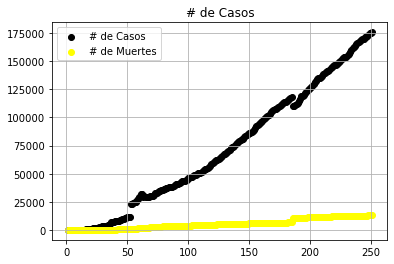

In [25]:
def f(x):  
    np.random.seed(42) 
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv('owid-covid-data.csv').fillna(0) 
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1) 
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

plt.scatter(x,y,label='# de Casos', color='black')
plt.scatter(x,y1,label='# de Muertes', color='yellow')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

In [26]:

df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases','iso_code']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df
#data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

,date,total_cases,iso_code
14965,-1,0.0,ECU
14966,0,0.0,ECU
14967,1,0.0,ECU
14968,2,0.0,ECU
14969,3,0.0,ECU
...,...,...,...
15277,311,172508.0,ECU
15278,312,173486.0,ECU
15279,313,174907.0,ECU
15280,314,175269.0,ECU


In [27]:
regresion_lineal = LinearRegression() 

regresion_lineal.fit(x.reshape(-1,1), y) 
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 738.7116160121419, b = -20472.994294820717
y = 738.7116160121419x -20472.994294820717


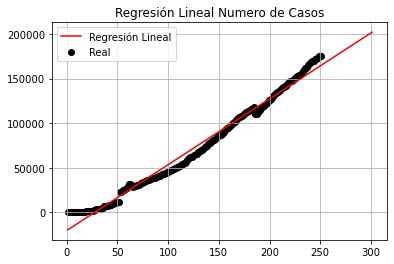

In [28]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.scatter(x,y,label='Real', color='black')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+51,1)
plt.plot(x1,fun(x1),color='red',label='Regresión Lineal')
plt.legend()
plt.show()

In [29]:
regresion_lineal = LinearRegression() 
regresion_lineal.fit(x.reshape(-1,1), y1) 
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 58.0323081009296, b = -1836.2979123505957
y = 58.0323081009296x -1836.2979123505957


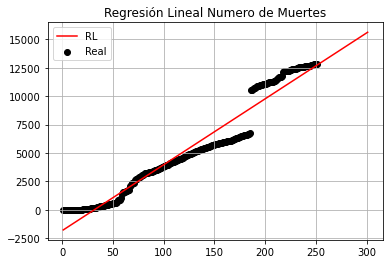

In [30]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.scatter(x,y1,label='Real', color='black')
plt.grid(True)
plt.title('Regresión Lineal Numero de Muertes');
x2 = np.arange(1,len(ndf1)+51,1)
plt.plot(x2,fun(x2),color='red',label='RL')
plt.legend()
plt.show()

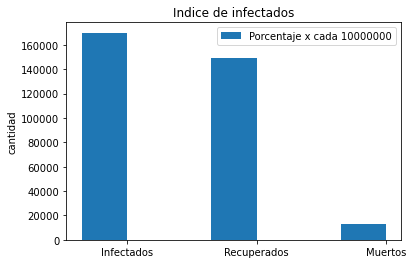

In [31]:
labels = ['Infectados', 'Recuperados', 'Muertos']
men_means = [170000,149000,12698]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Porcentaje x cada 10000000')
#rects2 = ax.bar(x + width/2, women_means, width, label='Mujer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('cantidad')
ax.set_title('Indice de infectados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Criterio personal (politico, economico y social de la situacion)
Lo politico juega un papel muy importante ya que de ellos depende de que el virus no se expanda por el pais, o de la organizacion al pais con sus debidas medias de precaucion para que no se expanda el virus ademas de el manejo corecto de los recursos para poder apoyar a todo la poblacion Ecuatoriana.
Economicmente el pais esta atravesando una cris por la mala administracion y el poco interes que mostranron los politicos ante esta pandemia.
En lo social mucha personas creo que recuperaron la humildad la humanidad de cada persona que es saber ayudar alos que mas necesitan de echo personas que no tiene ayudan a otras personas que no tenian nada.
En la actualidad el desempleo incremento y muchas familias atraviesan una situacion terrible, debemos solodarnos con las personas y ayudar alos que no tiene, las personas del campo son las que estan estables economicamente gracias a su trabajo en la tierra.
